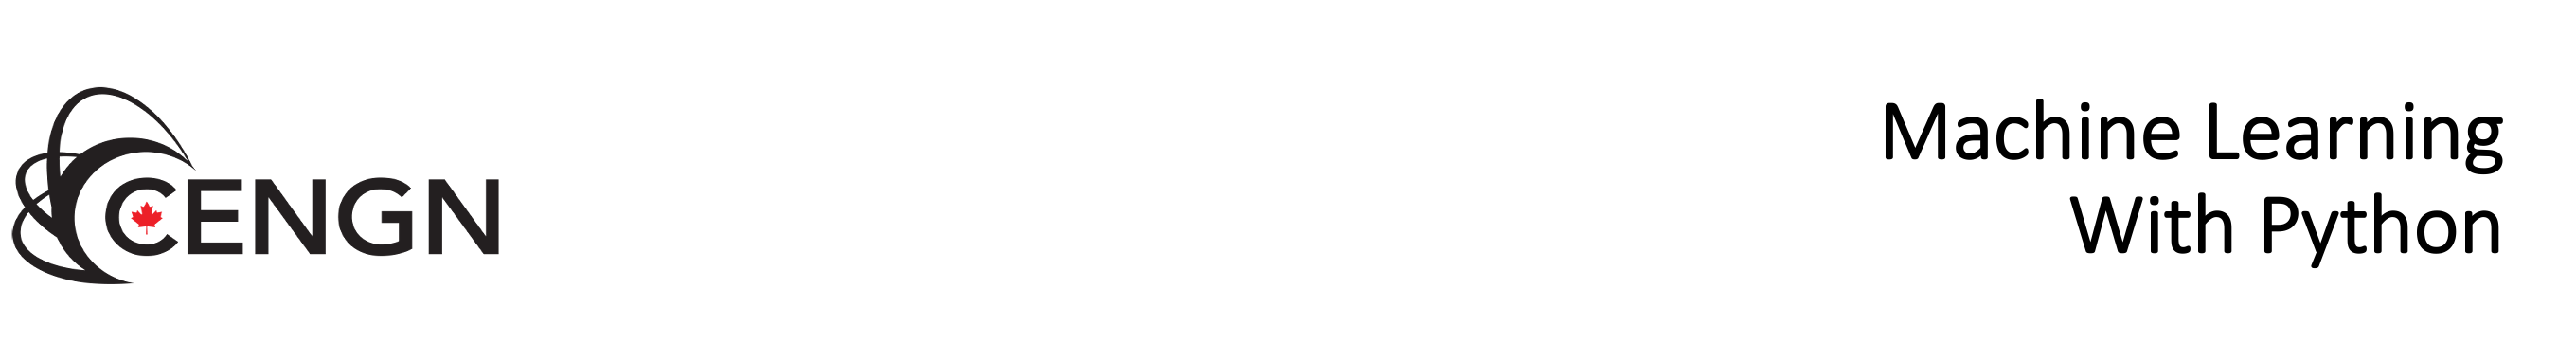
___

# **Section 4.3. Hands-On Clustering**

In this section, we will learn to implement the hierarchical clustering method using the popular scikit-learn library. 

## **Lab 3 - Hierarchical Clustering**

**Step 1: Importing Libraries**

In [1]:
# Import libraries 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

**Step 2: Creating a Dataset**

Define the data points represented by a NumPy array as follows:

In [2]:
# Define an array of fifteen observations, each with two feature values

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],
    [85,60],
    [71,58],
    [60,48],
    [80,55],
    [80,61],])

In [3]:
X.shape

(15, 2)

Since we created a sample dataset, there is no need to inspect or clean it.

**Step 3: Visualizing the Dataset**

Plot the fifteen observations on a two-dimensional plot using `Matplotlib`. 

The code snippets below plot the data points in the X NumPy array and label the observations from 1 to 15.

Note that `range()` is a Python function. `range(a,b)` returns a sequence of numbers starting at "a" and ending at "b-1."

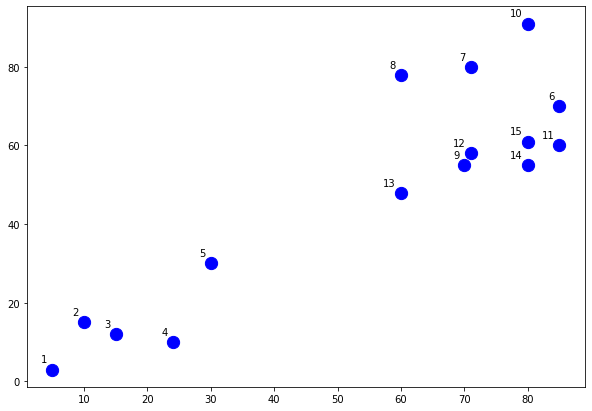

In [4]:
# Define figure characteristics

labels = range(1, 16) # Define the labels
plt.figure(figsize=(10, 7))    # figure size
plt.scatter(X[:,0],X[:,1], s = 150, label='True Position', color = 'blue')

# Label the observations from 1 to 15 then print the plot

for label, x, y in zip(labels, X[:, 0], X[:, 1]):   # zip() combines the ith element in each list
    plt.annotate(              # Annotate the point (observation) *xy* with text *text*
        label,
        xy=(x, y),        # The observation to annotate
        xytext=(-5, 5),      # Specify the position of the label wrt to the observation
        textcoords='offset points', ha='right', va='bottom')        
plt.show()

**Note:** You can play around with the image features to understand the role of different elements.

To better understand the code, we will display the output of the `zip()` function.

In [5]:
# Explaining the previous code

X1=X[:, 0]
print("X1",X1)

X2=X[:, 1]
print("X2",X2)

print("labels:")
for i in labels:
    print(i)
    
w = zip(labels, X[:, 0], X[:, 1])
print("\nzip() Output\n",tuple(w))

X1 [ 5 10 15 24 30 85 71 60 70 80 85 71 60 80 80]
X2 [ 3 15 12 10 30 70 80 78 55 91 60 58 48 55 61]
labels:
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15

zip() Output
 ((1, 5, 3), (2, 10, 15), (3, 15, 12), (4, 24, 10), (5, 30, 30), (6, 85, 70), (7, 71, 80), (8, 60, 78), (9, 70, 55), (10, 80, 91), (11, 85, 60), (12, 71, 58), (13, 60, 48), (14, 80, 55), (15, 80, 61))


**Step 4: Observations**

The reason we choose such a simple example to demonstrate the hierarchical clustering algorithm is because we can easily make out visually whether the algorithm is performing the job we set out for it to do. 

Visually, in this dataset, it can be seen that there are two prominent clusters: one at the bottom left consisting of observations 1-5, and one cluster at the top right, consisting of points 6-15. The cluster in the top right also appears to naturally lie in a hierarchical fashion. That is, one can imagine two smaller clusters, one consisting of points 7, 8, and 10, and another cluster consisting of points 6, 9, 11, 12, 13, 14, and 15.

Of course, in real-world applications,  datasets will be much larger, numbering thousands or sometimes millions of observations, and certainly will have more than two features. It would be challenging to visually inspect the clustering in those situations. For instructional purposes, it is therefore ideal to learn the implementation on a simple dataset. 

**Step 5: Running the Machine Learning Model**

For this lab, we will use the agglomerative hierarchical clustering algorithm.

In [6]:
# Fit the clustering model to the data

cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

# The Euclidean affinity argument tells the algorithm to compute the distance
# between two observations. 

# The linkage argument tells the algorithm to merge the two nearest clusters.

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The above output reveals the clusters identified by the model and shows to which cluster does each observation belong. 

Let us now view the clusters obtained by the hierarchical clustering algorithm.

**Note:** Refer to Matplotlib documentation to learn alternative colormap options.

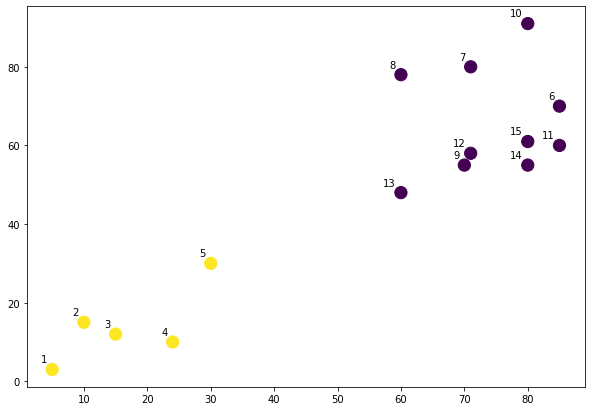

In [7]:
# Plot the two clusters using different colors 

plt.figure(figsize=(10, 7))  
plt.scatter(X[:,0],X[:,1], s=150, c=cluster.labels_, cmap='viridis')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):   # zip() combines the ith element in each list
    plt.annotate(              # Annotate the point (observation) *xy* with text *text*
        label,
        xy=(x, y),        # The observation to annotate
        xytext=(-5, 5),      # Specify the position of the label wrt to the observation
        textcoords='offset points', ha='right', va='bottom')        
plt.show()

The algorithm has identified the two prominent clusters that we have visually identified.

**Step 6: Plotting the Dendrogram**

In the above code snippet, we were interested only in the topmost hierarchy, that is, when the data is split into two clusters. Now, let us map out the complete tree representation, that is, the dendrogram using the `dendrogram` and `linkage` SciPy library functions. 

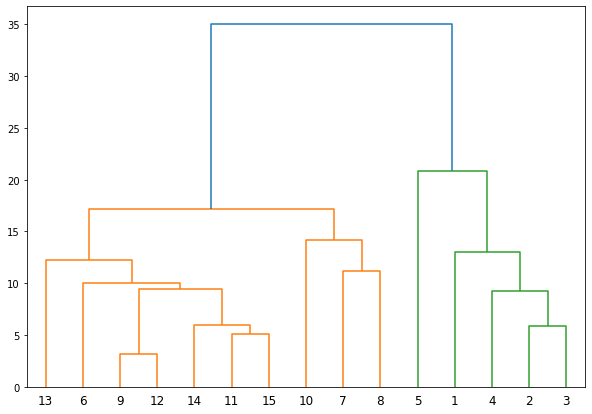

In [8]:
# Define the linkage matrix encoding the hierarchical clustering to render as a dendrogram.

linked = linkage(X, 'single')

# Label on the plot 

labelList = range(1, 16) # Return a sequence of 15 numbers (1 to 15)

# Display the plot

plt.figure(figsize=(10, 7))

# Specify the orientation; whether the tree is displayed top-down or bottom-up

dendrogram(linked, 
            orientation='top',
            labels=labelList,
            show_leaf_counts=True)

plt.show()

The dendrogram reveals that the cluster consisting of observations 6-15 can be split into two smaller clusters, one consisting of points 7, 8, and 10, and another cluster consisting of points 6, 9, 11, 12, 13, 14, and 15.

In the next exercise, we will re-run the algorithm with three clusters using a hyperparameter. This step is known as **model tuning**.

## **Exercise**

Run the same algorithm again, but this time specify the number of clusters, then plot the predicted clusters.

**Hint:** Use `Shift + 4 Tabs` shortcut to pull the documentation of `AgglomerativeClustering()` and figure out the parameter that you should use to specify the number of clusters.

In [9]:
# Run the hierarchical clustering model with three clusters
# Fit the clustering model to the data

cluster3 = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
cluster3.fit_predict(X)

# The Euclidean affinity argument tells the algorithm to compute the distance
# between two observations. 

# The linkage argument tells the algorithm to merge the two nearest clusters.

array([0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1])

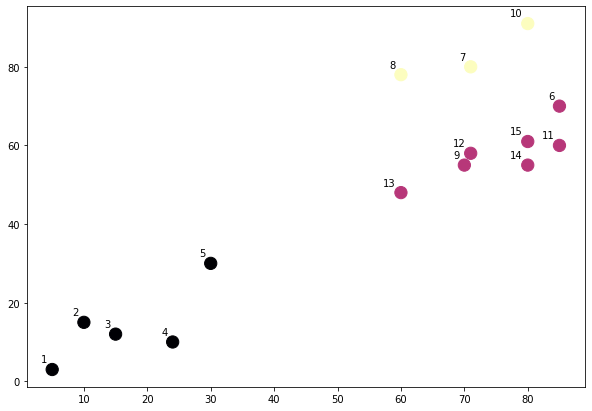

In [10]:
# Plot the clusters  
# Plot the three clusters using different colors 

plt.figure(figsize=(10, 7))  
plt.scatter(X[:,0],X[:,1], s=150, c=cluster3.labels_, cmap='magma')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):   # zip() combines the ith element in each list
    plt.annotate(              # Annotate the point (observation) *xy* with text *text*
        label,
        xy=(x, y),        # The observation to annotate
        xytext=(-5, 5),      # Specify the position of the label wrt to the observation
        textcoords='offset points', ha='right', va='bottom')        
plt.show()

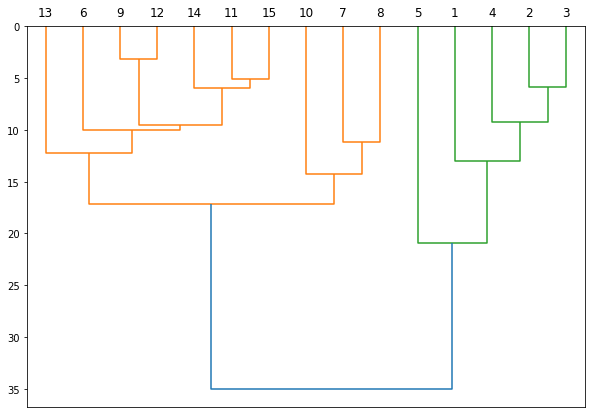

In [11]:
# Define the linkage matrix encoding the hierarchical clustering to render as a dendrogram.

linked3 = linkage(X, 'single')

# Label on the plot 

labelList = range(1, 16) # Return a sequence of 15 numbers (1 to 15)

# Display the plot

plt.figure(figsize=(10, 7))

# Specify the orientation; whether the tree is displayed top-down or bottom-up

dendrogram(linked3, 
            orientation='bottom',
            labels=labelList,
            show_leaf_counts=True)

plt.show()

Remember to shutdown this notebook once done from this lab.

## **Switch to LMS**

Switch to LMS to review the lab results and then start with the next lab (Lab 4 - Mixture Models).